In [2]:
from qiskit import QuantumCircuit, transpile
from qiskit_aer import Aer
import numpy as np
from qiskit.visualization import plot_histogram
import matplotlib.pyplot as plt

# Function to calculate amplification factor based on channel conditions
def calculate_amplification_factor(channel_condition):
    return np.pi / (4 * (1 + channel_condition))

# Function to apply dynamic amplitude amplification based on channel conditions
def dynamic_amplitude_amplification(circuit, qubit_0, qubit_1, channel_condition):
    amplification_factor = calculate_amplification_factor(channel_condition)
    circuit.cp(amplification_factor, qubit_0, qubit_1)  # Use cp (controlled-phase gate)

# Function to create a quantum circuit for N users
def create_amplified_circuit(num_users, channel_conditions):
    circuit = QuantumCircuit(num_users)

    # Apply Hadamard gates to all qubits
    for qubit in range(num_users):
        circuit.h(qubit)

    # Apply dynamic amplitude amplification between selected pairs of users
    for i in range(num_users):
        for j in range(i + 1, num_users):
            dynamic_amplitude_amplification(circuit, i, j, channel_conditions[i])

    # Apply Hadamard gates again
    for qubit in range(num_users):
        circuit.h(qubit)

    # Measure all qubits
    circuit.measure_all()
    
    return circuit

# Number of users (reduce to a smaller number if memory is an issue)
num_users = 10  # Example: change to 10 for testing, or adjust as needed

# Generate random channel conditions for each user
channel_conditions = np.random.uniform(0.1, 1.0, num_users)

# Create the quantum circuit for the given number of users
amplified_circuit = create_amplified_circuit(num_users, channel_conditions)

# Optimize the circuit to reduce memory usage
optimized_circuit = transpile(amplified_circuit, optimization_level=3)

# Run the circuit on a qasm simulator
backend = Aer.get_backend('qasm_simulator')
job = backend.run(optimized_circuit, shots=1024)
result = job.result()
counts = result.get_counts()

# Print the quantum circuit in text format
print(optimized_circuit.draw(output='text'))

# Plot the histogram of results and save as an image file
histogram = plot_histogram(counts)

# Now explicitly display the histogram
plt.show()


         ┌───┐                                                                 »
    q_0: ┤ H ├─■────────────■─────────────────────────■────────────────────────»
         ├───┤ │P(0.48114)  │                         │                        »
    q_1: ┤ H ├─■────────────┼────────────■────────────┼────────────■───────────»
         ├───┤              │P(0.48114)  │P(0.51677)  │            │           »
    q_2: ┤ H ├──────────────■────────────■────────────┼────────────┼───────────»
         ├───┤                                        │P(0.48114)  │P(0.51677) »
    q_3: ┤ H ├────────────────────────────────────────■────────────■───────────»
         ├───┤                                                                 »
    q_4: ┤ H ├─────────────────────────────────────────────────────────────────»
         ├───┤                                                                 »
    q_5: ┤ H ├─────────────────────────────────────────────────────────────────»
         ├───┤              

Successfully ran circuit for 1 users.
Optimized Circuit:
         ░ ┌─┐
     q: ─░─┤M├
         ░ └╥┘
meas: 1/════╩═
            0 


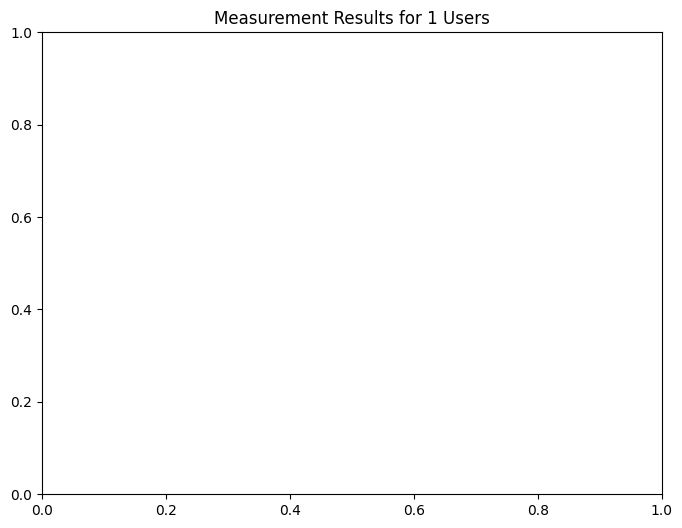

Successfully ran circuit for 2 users.
Optimized Circuit:
        ┌───┐             ┌───┐ ░ ┌─┐   
   q_0: ┤ H ├─■───────────┤ H ├─░─┤M├───
        ├───┤ │P(0.50341) ├───┤ ░ └╥┘┌─┐
   q_1: ┤ H ├─■───────────┤ H ├─░──╫─┤M├
        └───┘             └───┘ ░  ║ └╥┘
meas: 2/═══════════════════════════╩══╩═
                                   0  1 


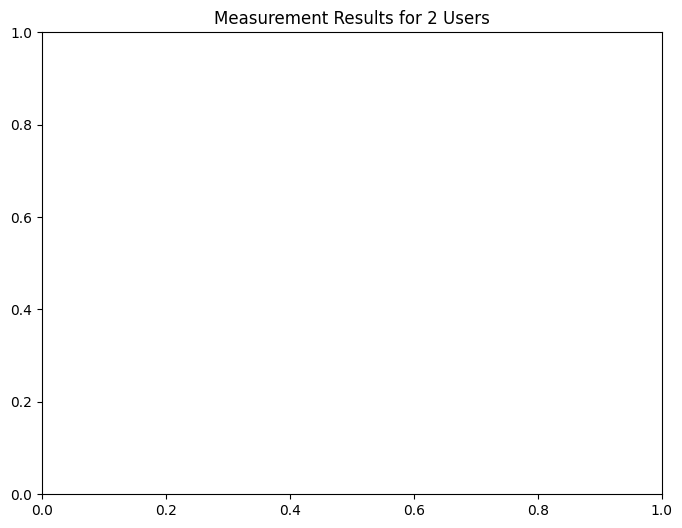

Successfully ran circuit for 3 users.
Optimized Circuit:
        ┌───┐                              ┌───┐          ░ ┌─┐      
   q_0: ┤ H ├─■────────────■───────────────┤ H ├──────────░─┤M├──────
        ├───┤ │P(0.42447)  │               └───┘    ┌───┐ ░ └╥┘┌─┐   
   q_1: ┤ H ├─■────────────┼────────────■───────────┤ H ├─░──╫─┤M├───
        ├───┤              │P(0.42447)  │P(0.53582) ├───┤ ░  ║ └╥┘┌─┐
   q_2: ┤ H ├──────────────■────────────■───────────┤ H ├─░──╫──╫─┤M├
        └───┘                                       └───┘ ░  ║  ║ └╥┘
meas: 3/═════════════════════════════════════════════════════╩══╩══╩═
                                                             0  1  2 


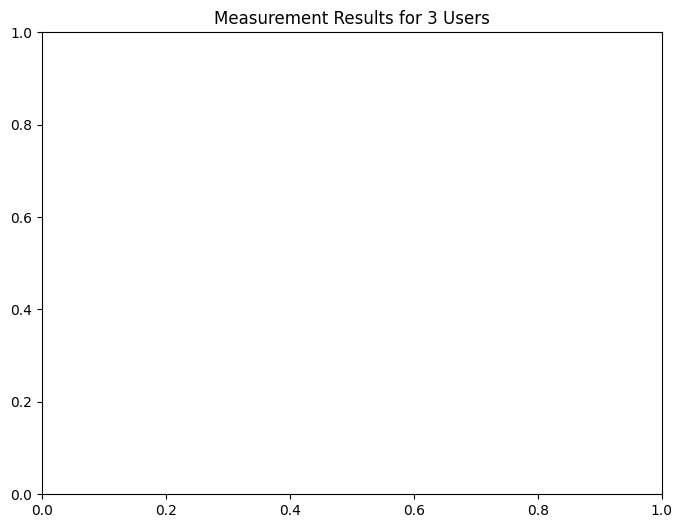

Successfully ran circuit for 4 users.
Optimized Circuit:
        ┌───┐                                                        ┌───┐    »
   q_0: ┤ H ├─■────────────■─────────────────────────■───────────────┤ H ├────»
        ├───┤ │P(0.50014)  │                         │               └───┘    »
   q_1: ┤ H ├─■────────────┼────────────■────────────┼────────────■───────────»
        ├───┤              │P(0.50014)  │P(0.58085)  │            │           »
   q_2: ┤ H ├──────────────■────────────■────────────┼────────────┼───────────»
        ├───┤                                        │P(0.50014)  │P(0.58085) »
   q_3: ┤ H ├────────────────────────────────────────■────────────■───────────»
        └───┘                                                                 »
meas: 4/══════════════════════════════════════════════════════════════════════»
                                                                              »
«                           ░ ┌─┐         
«   q_0: ───────────

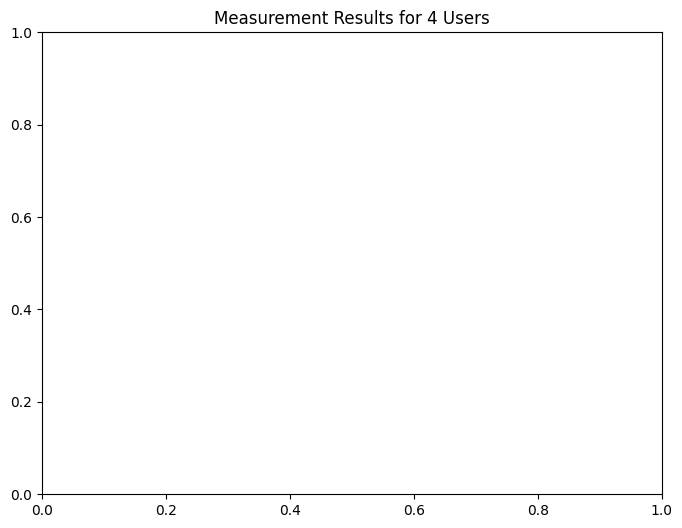

Successfully ran circuit for 5 users.
Optimized Circuit:
        ┌───┐                                                                 »
   q_0: ┤ H ├─■────────────■─────────────────────────■────────────────────────»
        ├───┤ │P(0.43405)  │                         │                        »
   q_1: ┤ H ├─■────────────┼────────────■────────────┼────────────■───────────»
        ├───┤              │P(0.43405)  │P(0.57093)  │            │           »
   q_2: ┤ H ├──────────────■────────────■────────────┼────────────┼───────────»
        ├───┤                                        │P(0.43405)  │P(0.57093) »
   q_3: ┤ H ├────────────────────────────────────────■────────────■───────────»
        ├───┤                                                                 »
   q_4: ┤ H ├─────────────────────────────────────────────────────────────────»
        └───┘                                                                 »
meas: 5/═══════════════════════════════════════════════════════

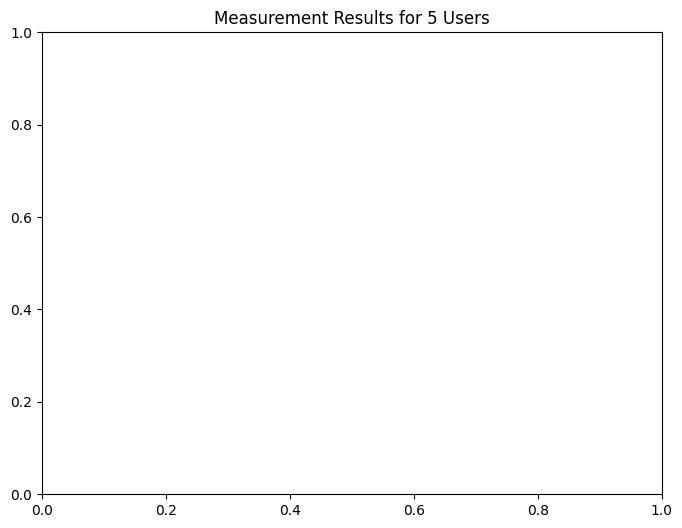

Successfully ran circuit for 6 users.
Optimized Circuit:
        ┌───┐                                                               »
   q_0: ┤ H ├─■────────────■────────────────────────■───────────────────────»
        ├───┤ │P(0.39967)  │                        │                       »
   q_1: ┤ H ├─■────────────┼────────────■───────────┼────────────■──────────»
        ├───┤              │P(0.39967)  │P(0.6375)  │            │          »
   q_2: ┤ H ├──────────────■────────────■───────────┼────────────┼──────────»
        ├───┤                                       │P(0.39967)  │P(0.6375) »
   q_3: ┤ H ├───────────────────────────────────────■────────────■──────────»
        ├───┤                                                               »
   q_4: ┤ H ├───────────────────────────────────────────────────────────────»
        ├───┤                                                               »
   q_5: ┤ H ├───────────────────────────────────────────────────────────────»
       

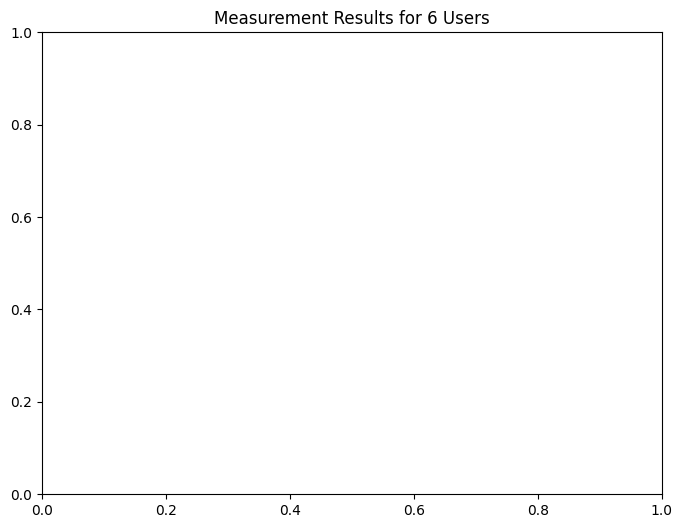

Successfully ran circuit for 7 users.
Optimized Circuit:
        ┌───┐                                                                 »
   q_0: ┤ H ├─■────────────■─────────────────────────■────────────────────────»
        ├───┤ │P(0.47803)  │                         │                        »
   q_1: ┤ H ├─■────────────┼────────────■────────────┼────────────■───────────»
        ├───┤              │P(0.47803)  │P(0.69356)  │            │           »
   q_2: ┤ H ├──────────────■────────────■────────────┼────────────┼───────────»
        ├───┤                                        │P(0.47803)  │P(0.69356) »
   q_3: ┤ H ├────────────────────────────────────────■────────────■───────────»
        ├───┤                                                                 »
   q_4: ┤ H ├─────────────────────────────────────────────────────────────────»
        ├───┤                                                                 »
   q_5: ┤ H ├──────────────────────────────────────────────────

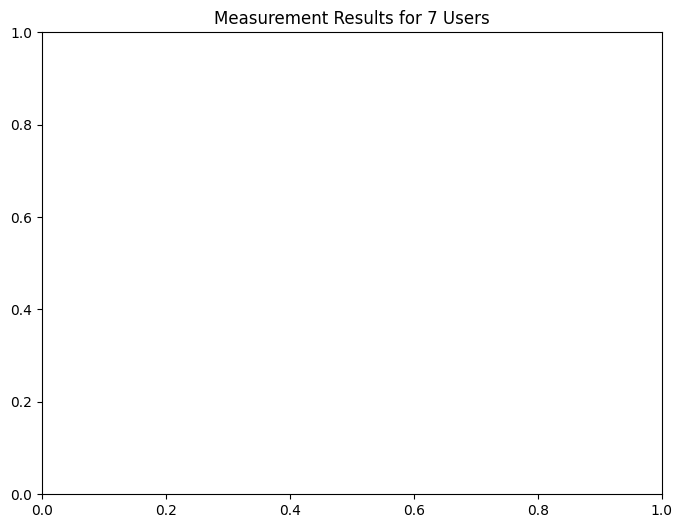

Successfully ran circuit for 8 users.
Optimized Circuit:
        ┌───┐                                                                 »
   q_0: ┤ H ├─■────────────■─────────────────────────■────────────────────────»
        ├───┤ │P(0.39473)  │                         │                        »
   q_1: ┤ H ├─■────────────┼────────────■────────────┼────────────■───────────»
        ├───┤              │P(0.39473)  │P(0.53104)  │            │           »
   q_2: ┤ H ├──────────────■────────────■────────────┼────────────┼───────────»
        ├───┤                                        │P(0.39473)  │P(0.53104) »
   q_3: ┤ H ├────────────────────────────────────────■────────────■───────────»
        ├───┤                                                                 »
   q_4: ┤ H ├─────────────────────────────────────────────────────────────────»
        ├───┤                                                                 »
   q_5: ┤ H ├──────────────────────────────────────────────────

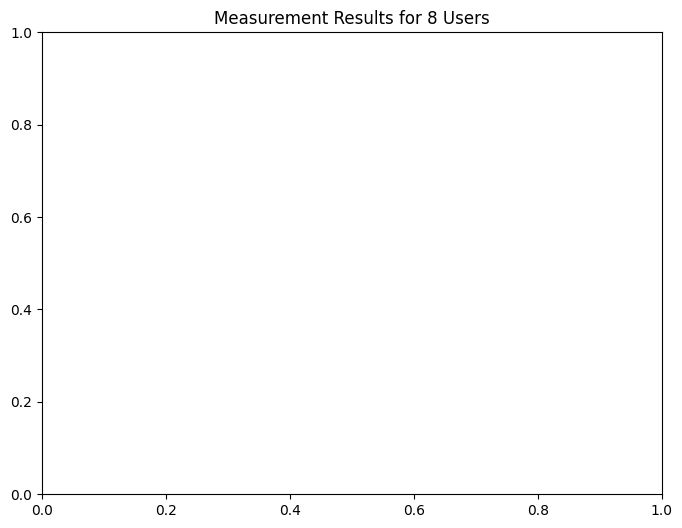

Successfully ran circuit for 9 users.
Optimized Circuit:
        ┌───┐                                                                 »
   q_0: ┤ H ├─■────────────■─────────────────────────■────────────────────────»
        ├───┤ │P(0.51254)  │                         │                        »
   q_1: ┤ H ├─■────────────┼────────────■────────────┼────────────■───────────»
        ├───┤              │P(0.51254)  │P(0.55093)  │            │           »
   q_2: ┤ H ├──────────────■────────────■────────────┼────────────┼───────────»
        ├───┤                                        │P(0.51254)  │P(0.55093) »
   q_3: ┤ H ├────────────────────────────────────────■────────────■───────────»
        ├───┤                                                                 »
   q_4: ┤ H ├─────────────────────────────────────────────────────────────────»
        ├───┤                                                                 »
   q_5: ┤ H ├──────────────────────────────────────────────────

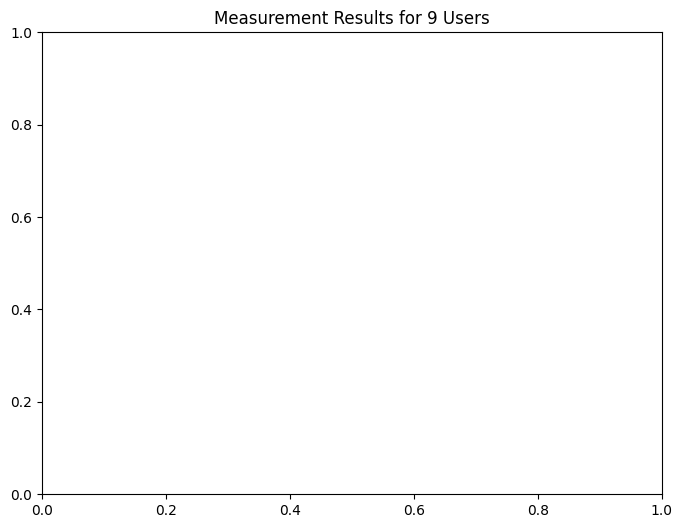

Successfully ran circuit for 10 users.
Optimized Circuit:
         ┌───┐                                                                 »
    q_0: ┤ H ├─■────────────■─────────────────────────■────────────────────────»
         ├───┤ │P(0.44082)  │                         │                        »
    q_1: ┤ H ├─■────────────┼────────────■────────────┼────────────■───────────»
         ├───┤              │P(0.44082)  │P(0.52106)  │            │           »
    q_2: ┤ H ├──────────────■────────────■────────────┼────────────┼───────────»
         ├───┤                                        │P(0.44082)  │P(0.52106) »
    q_3: ┤ H ├────────────────────────────────────────■────────────■───────────»
         ├───┤                                                                 »
    q_4: ┤ H ├─────────────────────────────────────────────────────────────────»
         ├───┤                                                                 »
    q_5: ┤ H ├─────────────────────────────────────

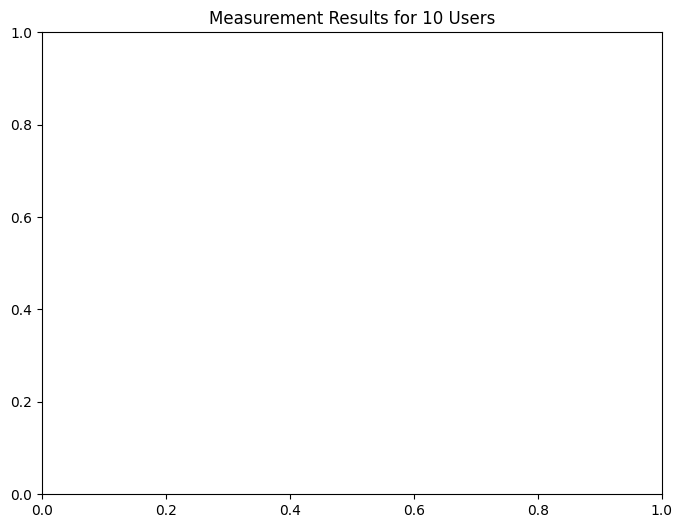

Successfully ran circuit for 11 users.
Optimized Circuit:
         ┌───┐                                                                 »
    q_0: ┤ H ├─■────────────■─────────────────────────■────────────────────────»
         ├───┤ │P(0.54957)  │                         │                        »
    q_1: ┤ H ├─■────────────┼────────────■────────────┼────────────■───────────»
         ├───┤              │P(0.54957)  │P(0.41318)  │            │           »
    q_2: ┤ H ├──────────────■────────────■────────────┼────────────┼───────────»
         ├───┤                                        │P(0.54957)  │P(0.41318) »
    q_3: ┤ H ├────────────────────────────────────────■────────────■───────────»
         ├───┤                                                                 »
    q_4: ┤ H ├─────────────────────────────────────────────────────────────────»
         ├───┤                                                                 »
    q_5: ┤ H ├─────────────────────────────────────

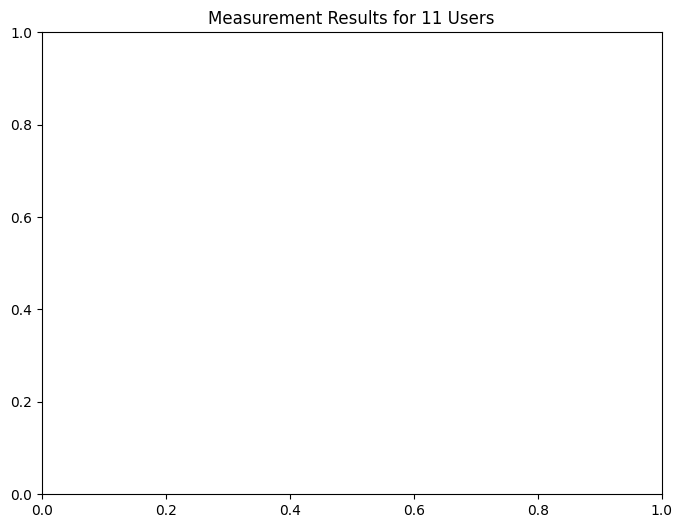

Successfully ran circuit for 12 users.
Optimized Circuit:
         ┌───┐                                                                 »
    q_0: ┤ H ├─■────────────■─────────────────────────■────────────────────────»
         ├───┤ │P(0.47945)  │                         │                        »
    q_1: ┤ H ├─■────────────┼────────────■────────────┼────────────■───────────»
         ├───┤              │P(0.47945)  │P(0.58054)  │            │           »
    q_2: ┤ H ├──────────────■────────────■────────────┼────────────┼───────────»
         ├───┤                                        │P(0.47945)  │P(0.58054) »
    q_3: ┤ H ├────────────────────────────────────────■────────────■───────────»
         ├───┤                                                                 »
    q_4: ┤ H ├─────────────────────────────────────────────────────────────────»
         ├───┤                                                                 »
    q_5: ┤ H ├─────────────────────────────────────

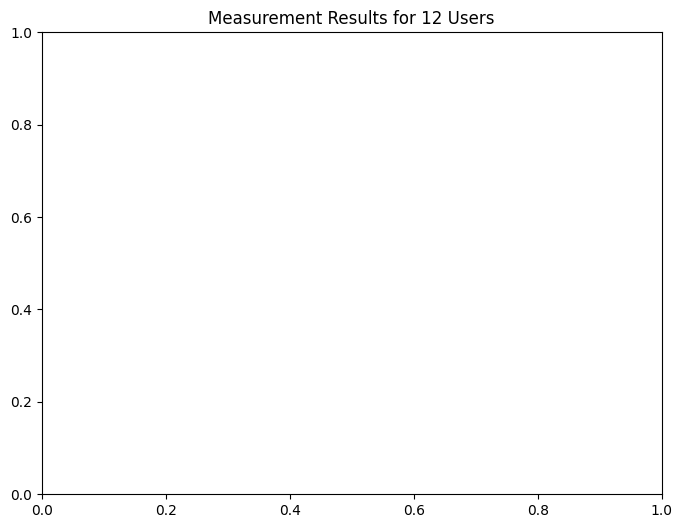

Successfully ran circuit for 13 users.
Optimized Circuit:
         ┌───┐                                                                 »
    q_0: ┤ H ├─■────────────■─────────────────────────■────────────────────────»
         ├───┤ │P(0.64239)  │                         │                        »
    q_1: ┤ H ├─■────────────┼────────────■────────────┼────────────■───────────»
         ├───┤              │P(0.64239)  │P(0.63438)  │            │           »
    q_2: ┤ H ├──────────────■────────────■────────────┼────────────┼───────────»
         ├───┤                                        │P(0.64239)  │P(0.63438) »
    q_3: ┤ H ├────────────────────────────────────────■────────────■───────────»
         ├───┤                                                                 »
    q_4: ┤ H ├─────────────────────────────────────────────────────────────────»
         ├───┤                                                                 »
    q_5: ┤ H ├─────────────────────────────────────

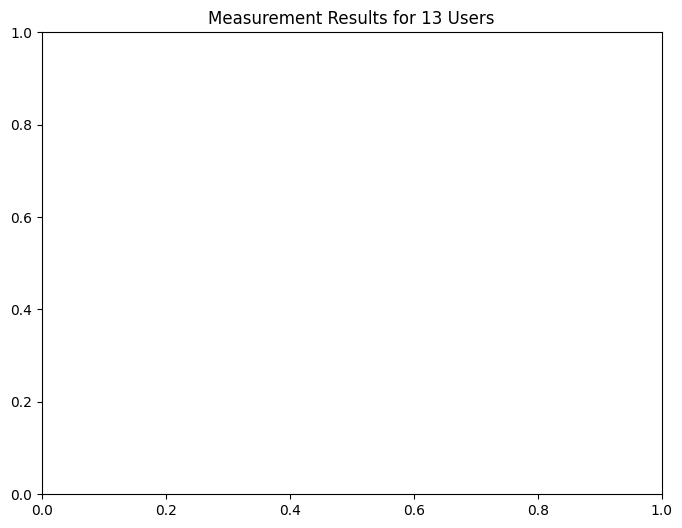

Successfully ran circuit for 14 users.
Optimized Circuit:
         ┌───┐                                                              »
    q_0: ┤ H ├─■───────────■────────────────────────■───────────────────────»
         ├───┤ │P(0.5623)  │                        │                       »
    q_1: ┤ H ├─■───────────┼───────────■────────────┼───────────■───────────»
         ├───┤             │P(0.5623)  │P(0.49141)  │           │           »
    q_2: ┤ H ├─────────────■───────────■────────────┼───────────┼───────────»
         ├───┤                                      │P(0.5623)  │P(0.49141) »
    q_3: ┤ H ├──────────────────────────────────────■───────────■───────────»
         ├───┤                                                              »
    q_4: ┤ H ├──────────────────────────────────────────────────────────────»
         ├───┤                                                              »
    q_5: ┤ H ├──────────────────────────────────────────────────────────────»
      

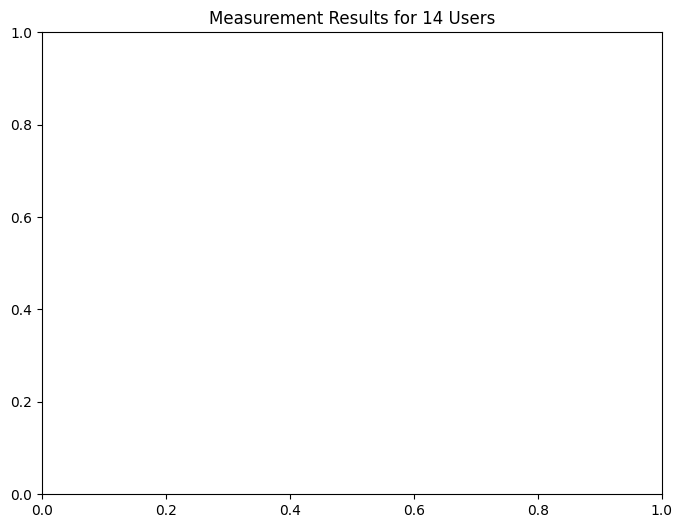

Successfully ran circuit for 15 users.
Optimized Circuit:
         ┌───┐                                                              »
    q_0: ┤ H ├─■───────────■────────────────────────■───────────────────────»
         ├───┤ │P(0.6556)  │                        │                       »
    q_1: ┤ H ├─■───────────┼───────────■────────────┼───────────■───────────»
         ├───┤             │P(0.6556)  │P(0.53434)  │           │           »
    q_2: ┤ H ├─────────────■───────────■────────────┼───────────┼───────────»
         ├───┤                                      │P(0.6556)  │P(0.53434) »
    q_3: ┤ H ├──────────────────────────────────────■───────────■───────────»
         ├───┤                                                              »
    q_4: ┤ H ├──────────────────────────────────────────────────────────────»
         ├───┤                                                              »
    q_5: ┤ H ├──────────────────────────────────────────────────────────────»
      

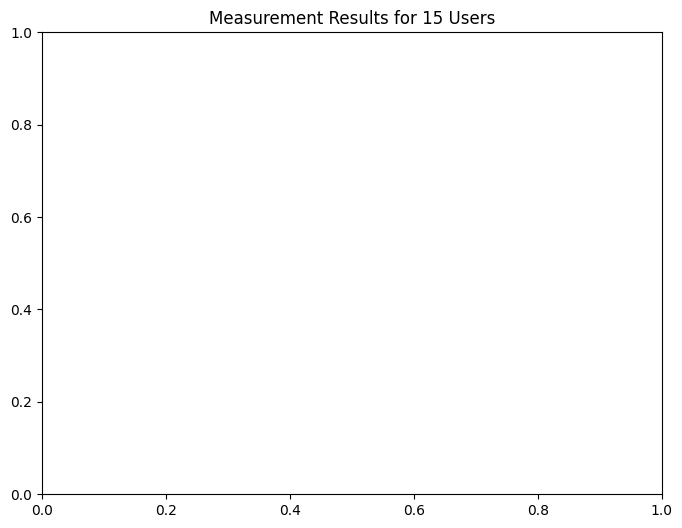

Successfully ran circuit for 16 users.
Optimized Circuit:
         ┌───┐                                                                 »
    q_0: ┤ H ├─■────────────■─────────────────────────■────────────────────────»
         ├───┤ │P(0.49762)  │                         │                        »
    q_1: ┤ H ├─■────────────┼────────────■────────────┼────────────■───────────»
         ├───┤              │P(0.49762)  │P(0.50397)  │            │           »
    q_2: ┤ H ├──────────────■────────────■────────────┼────────────┼───────────»
         ├───┤                                        │P(0.49762)  │P(0.50397) »
    q_3: ┤ H ├────────────────────────────────────────■────────────■───────────»
         ├───┤                                                                 »
    q_4: ┤ H ├─────────────────────────────────────────────────────────────────»
         ├───┤                                                                 »
    q_5: ┤ H ├─────────────────────────────────────

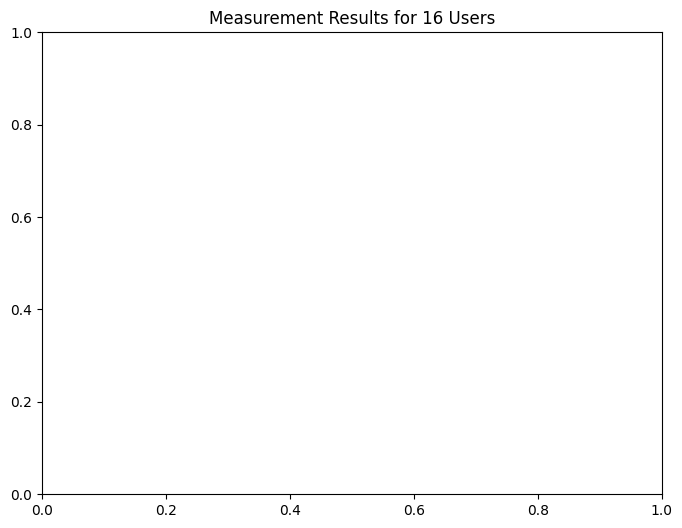

Successfully ran circuit for 17 users.
Optimized Circuit:
         ┌───┐                                                                 »
    q_0: ┤ H ├─■────────────■─────────────────────────■────────────────────────»
         ├───┤ │P(0.52663)  │                         │                        »
    q_1: ┤ H ├─■────────────┼────────────■────────────┼────────────■───────────»
         ├───┤              │P(0.52663)  │P(0.54099)  │            │           »
    q_2: ┤ H ├──────────────■────────────■────────────┼────────────┼───────────»
         ├───┤                                        │P(0.52663)  │P(0.54099) »
    q_3: ┤ H ├────────────────────────────────────────■────────────■───────────»
         ├───┤                                                                 »
    q_4: ┤ H ├─────────────────────────────────────────────────────────────────»
         ├───┤                                                                 »
    q_5: ┤ H ├─────────────────────────────────────

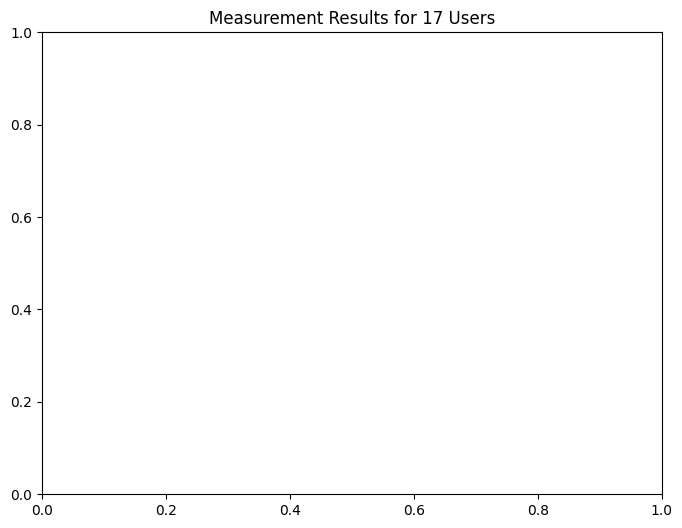

Successfully ran circuit for 18 users.
Optimized Circuit:
         ┌───┐                                                                 »
    q_0: ┤ H ├─■────────────■─────────────────────────■────────────────────────»
         ├───┤ │P(0.63311)  │                         │                        »
    q_1: ┤ H ├─■────────────┼────────────■────────────┼────────────■───────────»
         ├───┤              │P(0.63311)  │P(0.50769)  │            │           »
    q_2: ┤ H ├──────────────■────────────■────────────┼────────────┼───────────»
         ├───┤                                        │P(0.63311)  │P(0.50769) »
    q_3: ┤ H ├────────────────────────────────────────■────────────■───────────»
         ├───┤                                                                 »
    q_4: ┤ H ├─────────────────────────────────────────────────────────────────»
         ├───┤                                                                 »
    q_5: ┤ H ├─────────────────────────────────────

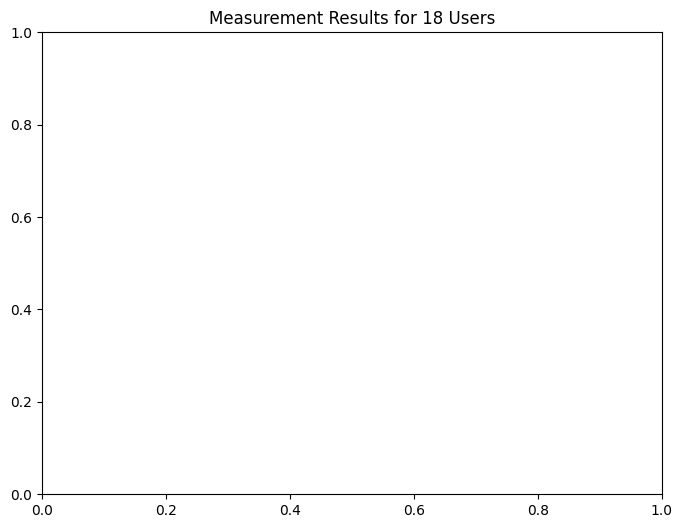

Successfully ran circuit for 19 users.
Optimized Circuit:
         ┌───┐                                                                 »
    q_0: ┤ H ├─■────────────■─────────────────────────■────────────────────────»
         ├───┤ │P(0.65502)  │                         │                        »
    q_1: ┤ H ├─■────────────┼────────────■────────────┼────────────■───────────»
         ├───┤              │P(0.65502)  │P(0.63706)  │            │           »
    q_2: ┤ H ├──────────────■────────────■────────────┼────────────┼───────────»
         ├───┤                                        │P(0.65502)  │P(0.63706) »
    q_3: ┤ H ├────────────────────────────────────────■────────────■───────────»
         ├───┤                                                                 »
    q_4: ┤ H ├─────────────────────────────────────────────────────────────────»
         ├───┤                                                                 »
    q_5: ┤ H ├─────────────────────────────────────

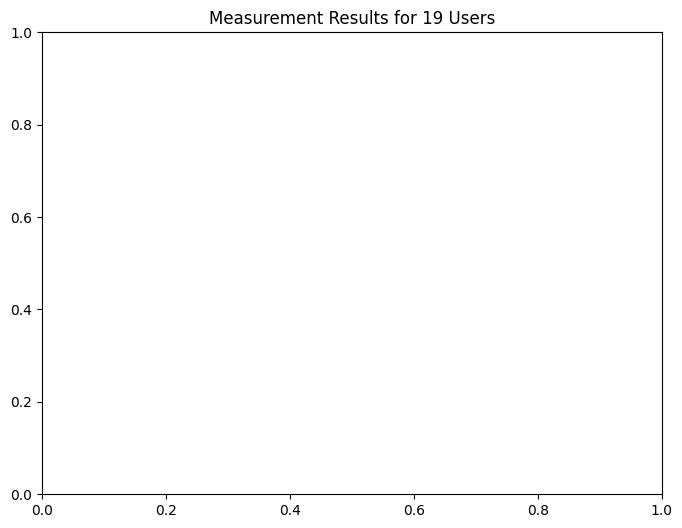

Time limit exceeded after testing 19 users.


In [3]:
from qiskit import QuantumCircuit, transpile
from qiskit_aer import Aer
import numpy as np
from qiskit.visualization import plot_histogram
import matplotlib.pyplot as plt
import time

# Function to calculate amplification factor based on channel conditions
def calculate_amplification_factor(channel_condition):
    return np.pi / (4 * (1 + channel_condition))

# Function to apply dynamic amplitude amplification based on channel conditions
def dynamic_amplitude_amplification(circuit, qubit_0, qubit_1, channel_condition):
    amplification_factor = calculate_amplification_factor(channel_condition)
    circuit.cp(amplification_factor, qubit_0, qubit_1)  # Use controlled-phase gate

# Function to create a quantum circuit for N users
def create_amplified_circuit(num_users, channel_conditions):
    circuit = QuantumCircuit(num_users)

    # Apply Hadamard gates to all qubits
    for qubit in range(num_users):
        circuit.h(qubit)

    # Apply dynamic amplitude amplification between selected pairs of users
    for i in range(num_users):
        for j in range(i + 1, num_users):
            dynamic_amplitude_amplification(circuit, i, j, channel_conditions[i])

    # Apply Hadamard gates again
    for qubit in range(num_users):
        circuit.h(qubit)

    # Measure all qubits
    circuit.measure_all()

    return circuit

# Function to test how many users can be processed within a time limit
def test_max_users_with_time_limit(max_test_users=30, time_limit=20):
    start_time = time.time()  # Record the start time
    for num_users in range(1, max_test_users + 1):  # Test from 1 to max_test_users
        elapsed_time = time.time() - start_time  # Calculate elapsed time

        # Stop if the elapsed time exceeds the time limit
        if elapsed_time > time_limit:
            print(f"Time limit exceeded after testing {num_users - 1} users.")
            break

        try:
            # Generate random channel conditions for each user
            channel_conditions = np.random.uniform(0.1, 1.0, num_users)

            # Create the quantum circuit for the given number of users
            amplified_circuit = create_amplified_circuit(num_users, channel_conditions)

            # Transpile the circuit for optimization and simulator compatibility
            optimized_circuit = transpile(amplified_circuit, backend=Aer.get_backend('qasm_simulator'), optimization_level=3)

            # Run the circuit on a qasm simulator
            backend = Aer.get_backend('qasm_simulator')
            job = backend.run(optimized_circuit, shots=1024)
            result = job.result()
            counts = result.get_counts()

            # Print the quantum circuit in text format
            print(f"Successfully ran circuit for {num_users} users.")
            print("Optimized Circuit:")
            print(optimized_circuit.draw(output='text'))

            # Visualize the histogram of results
            plt.figure(figsize=(8, 6))
            plot_histogram(counts)
            plt.title(f"Measurement Results for {num_users} Users")
            plt.show()

        except Exception as e:
            print(f"Error for {num_users} users: {e}")
            print(f"Maximum number of users the system can handle: {num_users - 1}")
            break

# Run the test for maximum users within a time limit
test_max_users_with_time_limit()